# Python API Tutorial: Getting Started with APIs

## Install packages

In [ ]:
!pip install requests pillow

In [60]:
import requests
from PIL import Image
from matplotlib import pyplot as plt
import base64
import io
from urllib.parse import urljoin
import pickle
import os

## open input image

In [98]:
INPUT_IMAGE_PATH = 'test_img.png'

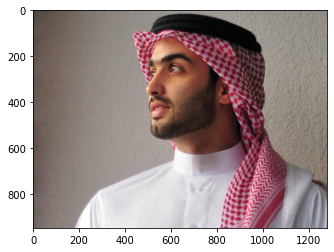

In [99]:
im = Image.open(INPUT_IMAGE_PATH)
plt.imshow(im)

## resize the input image within 1024x1024px.  

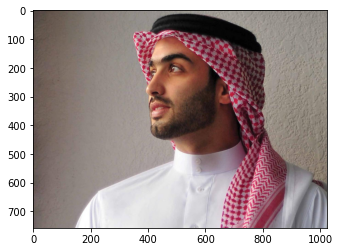

In [100]:
MAX_UPLOAD_SIZE = (1024, 1024)
im.thumbnail(MAX_UPLOAD_SIZE, Image.LANCZOS)
plt.imshow(im)

## comvert the input image to base64

In [101]:
buffer = io.BytesIO()
im.save(buffer, 'jpeg', quarity=90)
img_binary = buffer.getvalue()
img_base64 = base64.b64encode(img_binary).decode('utf-8')

## crop face and get facial metadata

In [102]:
API_BASE_URL = 'https://api.rembrandt-portrait-app.tokyo'
API_KEY = os.environ.get('API_KEY')

In [106]:
url = urljoin(API_BASE_URL, '/v1/detect')
payload = {'image': img_base64}
params = {'key': API_KEY}
res = requests.post(url, json=payload, params=params)
res

<Response [200]>

In [107]:
res.json()['meta']

{'status': 'ok', 'processing_time': '3.516625'}

This cropped image can be used as a preview to improve the user experience.

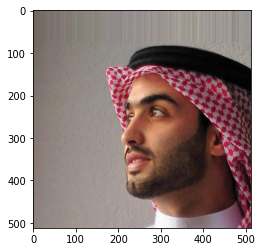

In [108]:
cropped_image = res.json()['data']['image']
cropped_image = Image.open(io.BytesIO(base64.b64decode(cropped_image)))
plt.imshow(cropped_image)

The metadata will be used in next step.  
Please save it.  

If the input image does not change, the metadata will not change.

In [110]:
facial_metadata = res.json()['data']['metadata']

**If the input image does not change, the metadata will not change and you can skip the above steps**

## convert image to rembrandt style

In [111]:
STYLE_ID = 'rembrandt_portrait-of-a-woman-1632_0'
SKIN_TONE = '0'

In [112]:
url = urljoin(API_BASE_URL, '/v1/convert')
payload = {
    'style': STYLE_ID,
    'metadata': facial_metadata,
    'skin_tone': SKIN_TONE
}
params = {'key': API_KEY}
res = requests.post(url, json=payload, params=params)
res

<Response [200]>

In [113]:
res.json()['meta']

{'status': 'ok', 'processing_time': '3.188128'}

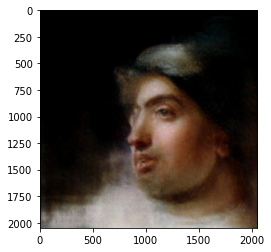

In [114]:
converted_image = res.json()['data']['image']
converted_image = Image.open(io.BytesIO(base64.b64decode(converted_image)))
plt.imshow(converted_image)